# Contour Detection using OpenCV

## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt

## Utility function for plotting image

In [2]:
def show_image(image, title, cmap = 'viridis'):
    plt.figure(figsize = (8, 8))
    plt.axis(False)
    plt.grid(False)
    plt.title(title, fontsize = 20)
    plt.imshow(image, cmap = cmap);

## Loading Image

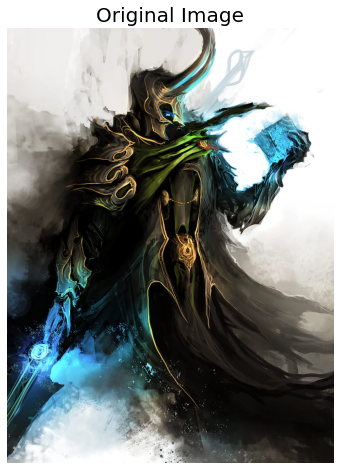

In [3]:
image = cv2.imread(r'..\Data\Images\Loki_abstract.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image(image, 'Original Image')

## Converting image to grayscale

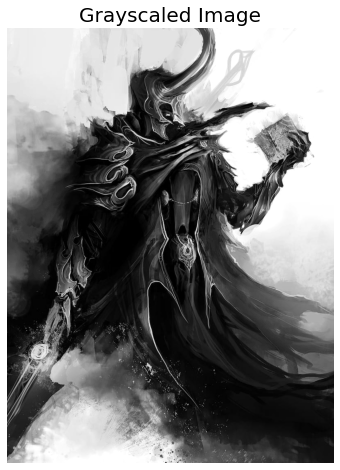

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

show_image(gray, 'Grayscaled Image', cmap = 'gray')

## Canny Edge Detection

### Getting binary image with edges

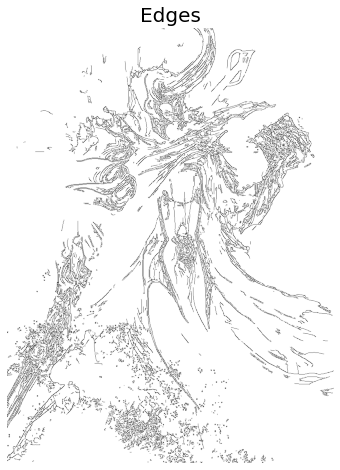

In [5]:
edge = cv2.Canny(gray, 100, 150)

show_image(edge, 'Edges', cmap = 'Greys')

### Using the edges to finc contours within the image

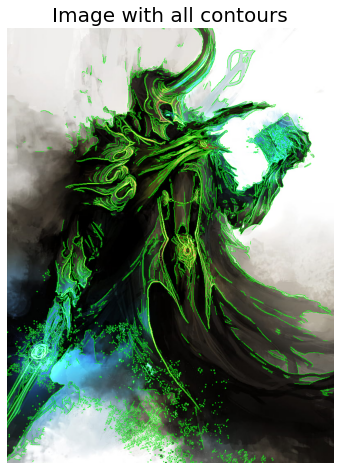

In [6]:
contours = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours[0], -1, (0, 255, 0), thickness = 1)

show_image(image, 'Image with all contours')

### Plotting only the top 100 contours by area

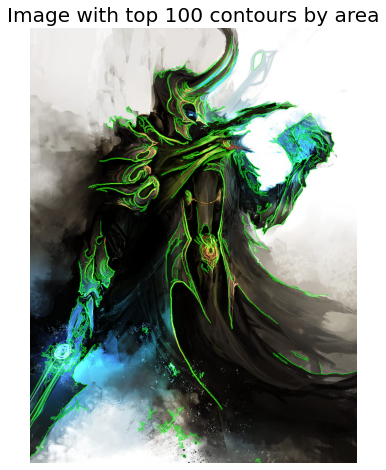

In [7]:
image = cv2.imread(r'..\Data\Images\Loki_abstract.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

contours, h = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
cv2.drawContours(image, contours[0:100], -1, (0, 255, 0), thickness = 1)

show_image(image, 'Image with top 100 contours by area')

## Threshold Binarization

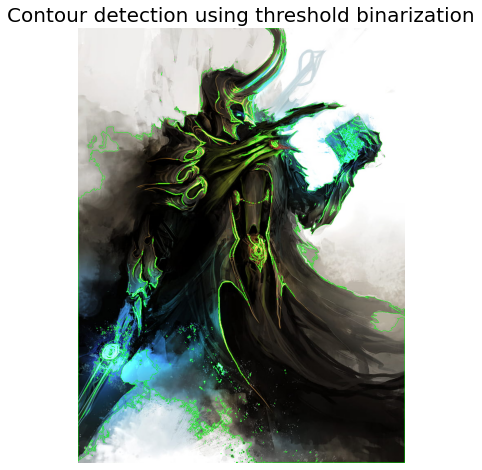

In [8]:
image = cv2.imread(r'..\Data\Images\Loki_abstract.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r, t = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)

contours, h = cv2.findContours(t, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key = cv2.contourArea, reverse=True)
cv2.drawContours(image, contours, -1, (0, 255, 0), thickness = 1)

show_image(image, 'Contour detection using threshold binarization')

## Convex Hull

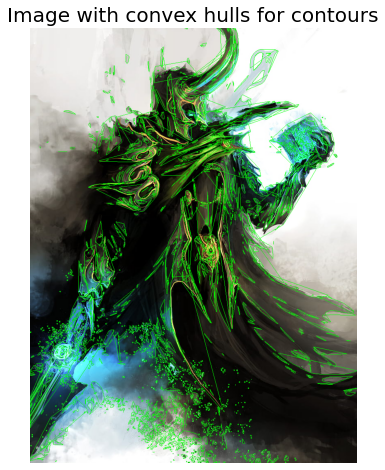

In [9]:
image = cv2.imread(r'..\Data\Images\Loki_abstract.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

contours, hierarchy = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), thickness = 1)

show_image(image, 'Image with convex hulls for contours')